In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import us

In [22]:
supportOld = pd.read_csv('MOPdata.csv', sep=',')
supportOld.head()

,Record ID,State/Territory,Contact Type,IP City,IP State/Region,IP Country,IP Timezone
0,96682411731,Alabama,Civilian,tuscaloosa,alabama,united states,america_slash_chicago
1,115245911772,Alabama,Partner,NaN,maharashtra,india,asia_slash_kolkata
2,102702448347,Alaska,Civilian,wasilla,alaska,united states,america_slash_anchorage
3,102196430523,Arizona,Civilian,gilbert,arizona,united states,america_slash_phoenix
4,103841671881,Arizona,Civilian,glendale,arizona,united states,america_slash_phoenix


In [18]:
support = pd.read_csv('MOPDataNew.csv', sep=',')
support.head()

,State/Territory,#
0,Alabama,3
1,Alaska,1
2,Arizona,11
3,Arkansas,7
4,California,33


In [7]:
support_data = round(support.groupby('State/Territory').size() / len(support) * 100, 2)
support_df = support_data.reset_index(name='Support Percentage')

state_abbr_map = {state.name: state.abbr for state in us.states.STATES}
support_df["State/Territory"] = support_df["State/Territory"].map(state_abbr_map)

In [12]:
shapefile_path = "C:/Users/kelby/Desktop/AI/MOPwork/MOPstateSupport/us_states"
states_map = gpd.read_file(shapefile_path)

states_map = states_map.to_crs("EPSG:5070")

states_map.rename(columns={'STUSPS': 'State/Territory'}, inplace = True)

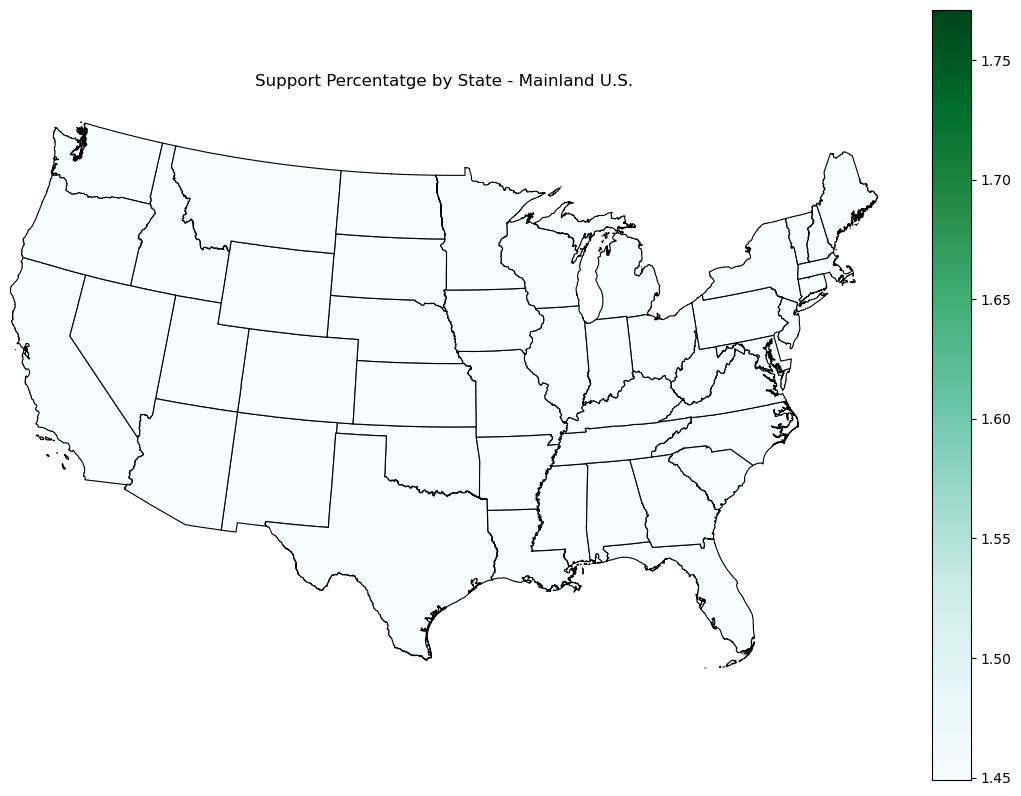

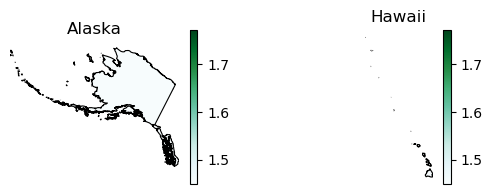

In [14]:
maingraph = states_map.merge(support_df, on="State/Territory", how="left")
maingraph["Support Percentage"] = maingraph["Support Percentage"].fillna(0)  # Ensure no missing values

# Ensure Alaska and Hawaii are excluded
alaska = maingraph[maingraph["State/Territory"] == "AK"]
alaska = alaska[alaska.geometry.area > 1e10]
hawaii = maingraph[maingraph["State/Territory"] == "HI"]
hawaii = hawaii[hawaii.geometry.area > 1e10]
mainland_only = maingraph[~maingraph["State/Territory"].isin(["AK", "HI"])]
mainland_only = mainland_only[mainland_only.geometry.area > 1e10] 

fig, ax = plt.subplots(figsize=(14, 10))
# Now plot just mainland states
mainland_only.plot(column='Support Percentage', cmap='BuGn', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(mainland_only.total_bounds[0], mainland_only.total_bounds[2])

ax.set_frame_on(False)
plt.title('Support Percentage by State - Mainland U.S.')
plt.savefig("Mainland.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

fig, axes = plt.subplots(ncols=2, figsize=(6, 2))  # Two side-by-side plots

# **Plot Alaska on Left**
alaska.plot(column='Support Percentage', cmap='BuGn', linewidth=0.8, edgecolor='black', legend=True, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlim(alaska.total_bounds[0], alaska.total_bounds[2])
axes[0].set_frame_on(False)
axes[0].set_title("Alaska")

# **Plot Hawaii on Right**
hawaii.plot(column='Support Percentage', cmap='BuGn', linewidth=0.8, edgecolor='black', legend=True, ax=axes[1])
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlim(hawaii.total_bounds[0], hawaii.total_bounds[2])
axes[1].set_frame_on(False)
axes[1].set_title("Hawaii")
plt.savefig("HIAK.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()